In [37]:
library("MASS")
library("vars")

In [38]:
VAR.sim=function(phi,sigma,Y0,Time){
    n=dim(phi)[[1]];
    res=array(NA,c(Time+1,n));
    res[1,]=Y0;
    for(i in 2:(Time+1))
        res[i,]=phi%*%res[i-1,]+mvrnorm(1, rep(0,n), sigma);
    res=res[-1,];
    return(res);
}

In [39]:
phi=diag(c(0.5,0.01,0.97))
sigma=array(c(4.42e-4,6.89e-5,1.55e-4,6.89e-5,3.66e-4,9.57e-5,1.55e-4,9.57e-5,1.42e-4),c(3,3))
Y0=c(0.07,-0.17,-0.009)
simulated.Data=VAR.sim(phi,sigma,Y0,1000)

In [32]:
phi

0.5,0.00,0.00
0.0,0.01,0.00
0.0,0.00,0.97


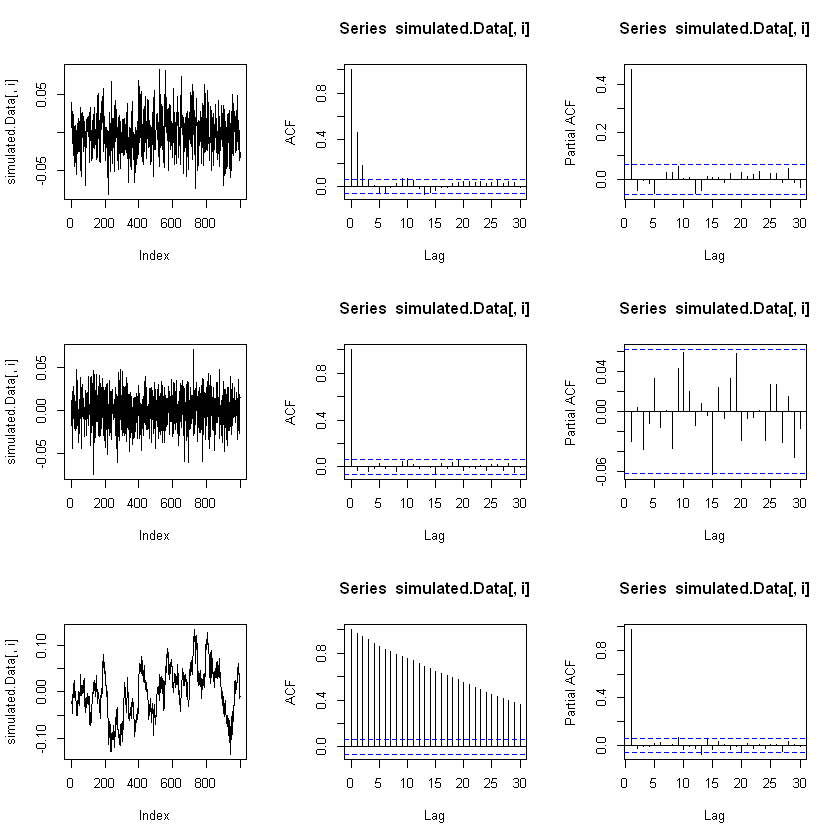

In [40]:
par(mfrow=c(3,3))
for(i in 1:3){
    plot(simulated.Data[,i], type="l")
    acf(simulated.Data[,i])
    pacf(simulated.Data[,i])
}

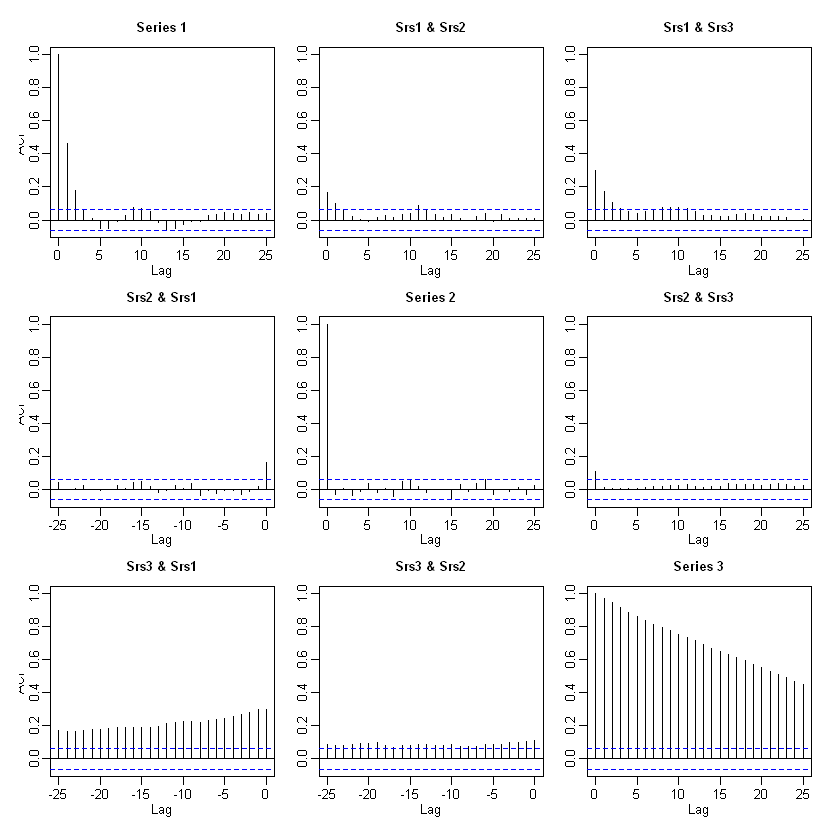

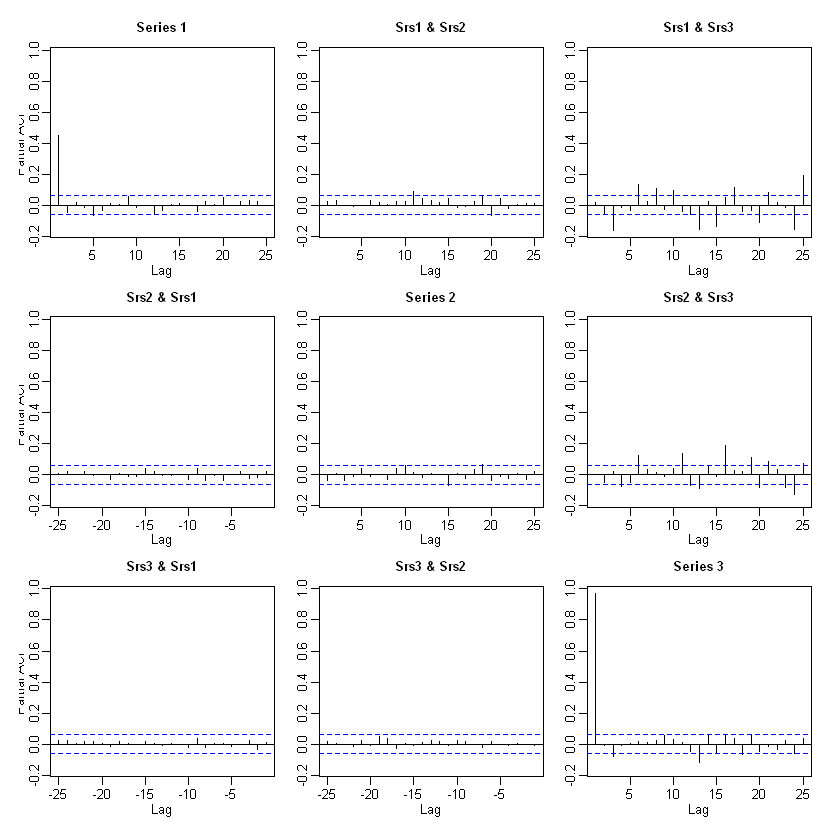

In [41]:
#cross correlation
acf(simulated.Data)
pacf(simulated.Data)

In [42]:
#Fit a var model
library(vars)
model=VAR(simulated.Data, p=1)
summary(model)

Warning message in VAR(simulated.Data, p = 1):
"No column names supplied in y, using: y1, y2, y3 , instead.
"


VAR Estimation Results:
Endogenous variables: y1, y2, y3 
Deterministic variables: const 
Sample size: 999 
Log Likelihood: 8320.689 
Roots of the characteristic polynomial:
0.9713 0.4497 0.03621
Call:
VAR(y = simulated.Data, p = 1)


Estimation results for equation y1: 
y1 = y1.l1 + y2.l1 + y3.l1 + const 

        Estimate Std. Error t value Pr(>|t|)    
y1.l1  0.4491549  0.0296940  15.126   <2e-16 ***
y2.l1  0.0244036  0.0363747   0.671    0.502    
y3.l1  0.0172119  0.0139896   1.230    0.219    
const -0.0007206  0.0006852  -1.052    0.293    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 0.02162 on 995 degrees of freedom
Multiple R-Squared: 0.2164,	Adjusted R-squared: 0.2141 
F-statistic: 91.62 on 3 and 995 DF,  p-value: < 2.2e-16 


Estimation results for equation y2: 
y2 = y1.l1 + y2.l1 + y3.l1 + const 

        Estimate Std. Error t value Pr(>|t|)
y1.l1  0.0191146  0.0262757   0.727    0.467
y2.l1 -0.0352717  0.0321874  -1.096   

In [43]:
sigma

4.42e-04,6.89e-05,1.55e-04
6.89e-05,3.66e-04,9.57e-05
1.55e-04,9.57e-05,1.42e-04


In [44]:
model.residuals=residuals(model)
#normality test or JB
normality.test(model)


$JB

	JB-Test (multivariate)

data:  Residuals of VAR object model
Chi-squared = 4.5143, df = 6, p-value = 0.6074


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object model
Chi-squared = 1.7497, df = 3, p-value = 0.6259


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object model
Chi-squared = 2.7646, df = 3, p-value = 0.4294


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object model
Chi-squared = 4.5143, df = 6, p-value = 0.6074


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object model
Chi-squared = 1.7497, df = 3, p-value = 0.6259


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object model
Chi-squared = 2.7646, df = 3, p-value = 0.4294




In [17]:
#Test for hederocadasticity
arch.test(model)


	ARCH (multivariate)

data:  Residuals of VAR object model
Chi-squared = 171.31, df = 180, p-value = 0.6665

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object model
Chi-squared = 171.31, df = 180, p-value = 0.6665



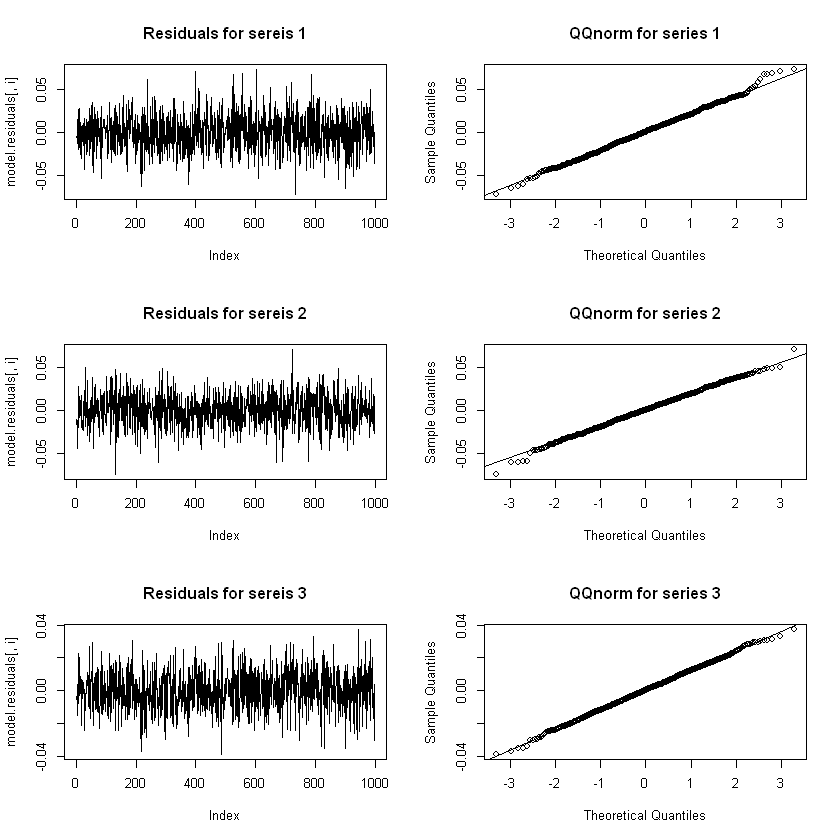

In [45]:
par(mfrow=c(3,2))
for(i in 1:3){
    plot(model.residuals[,i],main=paste("Residuals for sereis",i), type="l")
    qqnorm(model.residuals[,i], main=paste("QQnorm for series", i))
    qqline(model.residuals[,i])
}

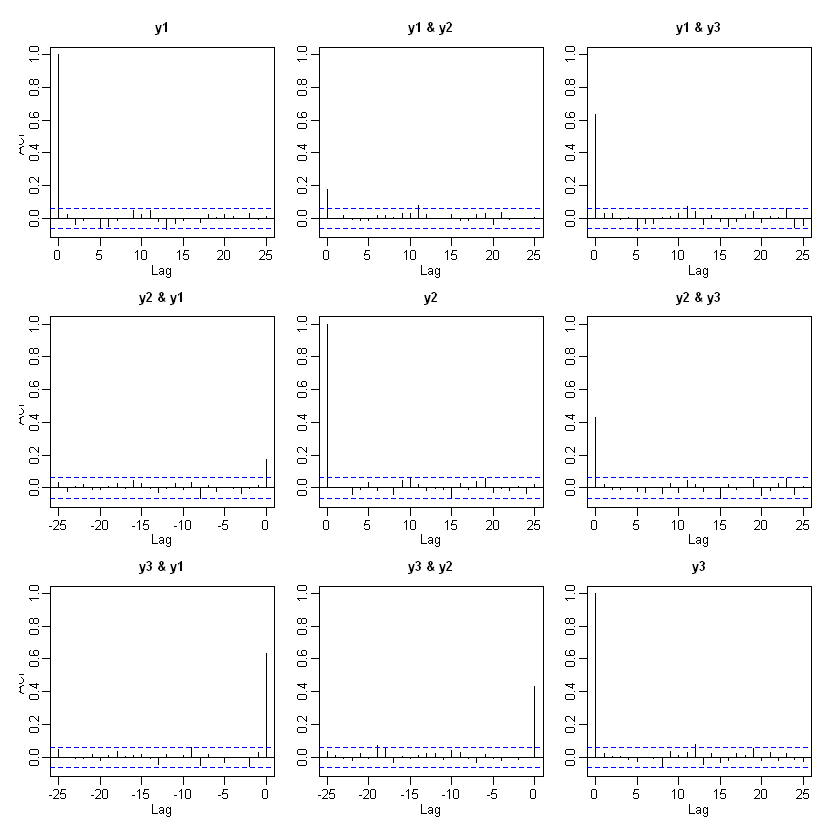


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object model
Chi-squared = 143.06, df = 135, p-value = 0.3009

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object model
Chi-squared = 143.06, df = 135, p-value = 0.3009



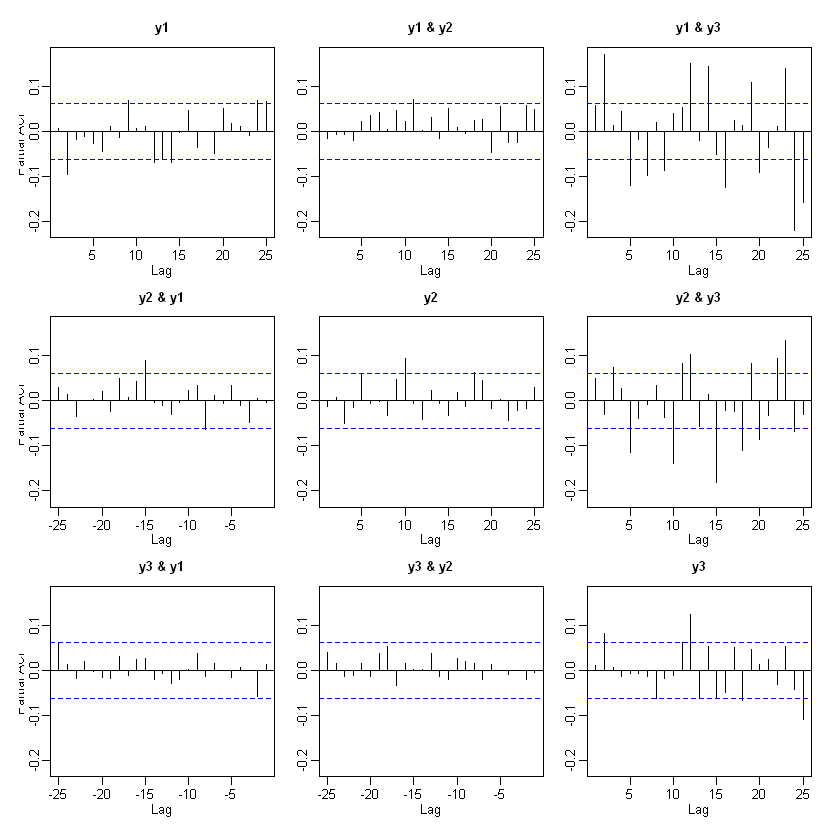

In [46]:
#Residual plot: White Noise Assumptiom
acf(model.residuals)
pacf(model.residuals)

#Testing for serial correlation (MV Portmonteau)
serial.test(model)